**Description:**

In the following we will try to do some EDA and grasp some information about the Text of the tweets we gathered in the first phase of this project:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv 
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from hazm import word_tokenize
import hazm


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirzar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# creating/writing a csv file - calling the text as a column
csv_file = open('./OpIran_cleanup.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Text"])

6

In [4]:
data = pd.read_csv("#Irancleanedup copy.csv")
data.head()

,Text
0,khamenei fears even commemoration slain protes...
1,#peace us #ukraine #russia #iran #belarus #war...
2,may feel like lonely fighters sometimes togeth...
3,buitenproportionele repressie #iran een diepte...
4,buitenproportionele repressie #iran een diepte...


In [5]:
# normalizing (the loop) text by making it lowercase
for index, row in data.iterrows():
    text = row['Text'].lower()
    # print(text)

    # 2. normalizing (loop body) the text by removing unicode characters
    text = re.sub(
        r"(\[A-Za-z0-9]+)|([^0-9A-Za-z#@ \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    # print(text)

    # 3.1 normalizing (loop body) the text by removing stopwords
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in stop])
    # print(text)

    # 3.2 remove the below list fo words from the text
    to_be_removed_list = ["the", "this", "that", "by", "in", "on", "or", "of"]
    text_as_list = text.split()
    for word in to_be_removed_list:
        if word in text_as_list:
            text_as_list.remove(word)
    # 3.3 rejoining the words from list to text
    text = " ".join([word for word in text_as_list])
    csv_writer.writerow([text])


In [12]:
data_cleaned = pd.read_csv("OpIran_cleanup.csv")
## Now we remove the duplicates data which are the retweeted tweets
data_cleaned_no_dup = data_cleaned.drop_duplicates()
data_cleaned_no_dup.sample(5)

,Text
373,december 31 tehran #iran footage locals near c...
450,december 31 tehran #iran protesters bazaar are...
458,dec 31javanrud w #iran additional footage secu...
384,december 31 tehran #iran locals continuing nat...
334,december 31 abadan southwest #iran official wo...


In [27]:
def text_analysis(hashtag: str):
    """
    This function load and prepares data based on given hashtag. It sorts
    :param hashtag:
    :return:
    """

    # We add all of the rows in a string:
    final_text = data_cleaned_no_dup['Text'].str.cat(sep='')

    # in the next step we separate each words
    word_list = final_text.split()

   
    # Define a counter to count each word,tag and hashtag
    def word_counter(word_list):
        d = {}
        for key in word_list:
            d[key] = d.get(key, 0) + 1

        # Next, sort from highest to lowest.
        number_of_key = sorted(d.items(), key=lambda x: x[1], reverse=True)

        return number_of_key
   
    # separate the hashtags and other words
    hashtags = []
    mentions = []
    words = []
    for word in word_list:
        if word[0] == '#':
            hashtags.append(word)
        elif word[0] == '@':
            mentions.append(word)
        else:
            words.append(word)

    word_count = word_counter(words)
    hashtag_count = word_counter(hashtags)
    mention_count = word_counter(mentions)
    

    return word_count , hashtag_count , mention_count



In [32]:
dict(text_analysis("#OpIran")[0])

{'regime': 61,
 '31': 54,
 'forces': 51,
 'security': 42,
 'people': 38,
 'killed': 37,
 'today': 27,
 'javanrud': 26,
 'locals': 25,
 'western': 24,
 'tehran': 22,
 'day': 21,
 'protesters': 20,
 'amp': 18,
 'mullahs': 18,
 'protests': 18,
 'chanting': 17,
 'iranian': 16,
 'nationwide': 16,
 'death': 15,
 'world': 15,
 'uprising': 15,
 'borhan': 14,
 'eliasi': 14,
 '22': 14,
 '107th': 14,
 'regimes': 13,
 'reports': 13,
 'bazaar': 13,
 'december': 12,
 'continuing': 12,
 'year': 12,
 'ceremony': 12,
 'footage': 12,
 'streets': 11,
 'khamenei': 10,
 'attacked': 10,
 'control': 10,
 'citys': 10,
 'social': 10,
 'media': 10,
 'days': 9,
 'ago': 9,
 'islamic': 9,
 'iran': 9,
 'according': 9,
 'local': 9,
 'held': 9,
 'central': 9,
 '40': 8,
 'iranians': 8,
 'new': 8,
 'youths': 8,
 'since': 7,
 'one': 7,
 'w': 7,
 'area': 7,
 'attacking': 7,
 'tear': 6,
 'gas': 6,
 'province': 6,
 'republic': 6,
 'time': 6,
 'getting': 6,
 'funeral': 6,
 'taking': 6,
 'prison': 6,
 'took': 6,
 'activists'

    Now we can use this function to count the most frequent words,hashtags and tags in our tweets.

Now that we have our data we can plot each of them!

[Text(0, 0, 'regime'),
 Text(1, 0, 'iran'),
 Text(2, 0, 'islamic'),
 Text(3, 0, 'people'),
 Text(4, 0, 'republic'),
 Text(5, 0, 'executed'),
 Text(6, 0, 'voice'),
 Text(7, 0, 'please'),
 Text(8, 0, 'iranian'),
 Text(9, 0, 'world'),
 Text(10, 0, 'execution'),
 Text(11, 0, 'freedom'),
 Text(12, 0, 'life'),
 Text(13, 0, 'death'),
 Text(14, 0, 'help'),
 Text(15, 0, 'one'),
 Text(16, 0, 'us'),
 Text(17, 0, 'stop'),
 Text(18, 0, 'danger'),
 Text(19, 0, 'protesters'),
 Text(20, 0, 'iranians'),
 Text(21, 0, 'dont'),
 Text(22, 0, 'support'),
 Text(23, 0, 'women'),
 Text(24, 0, 'thank')]

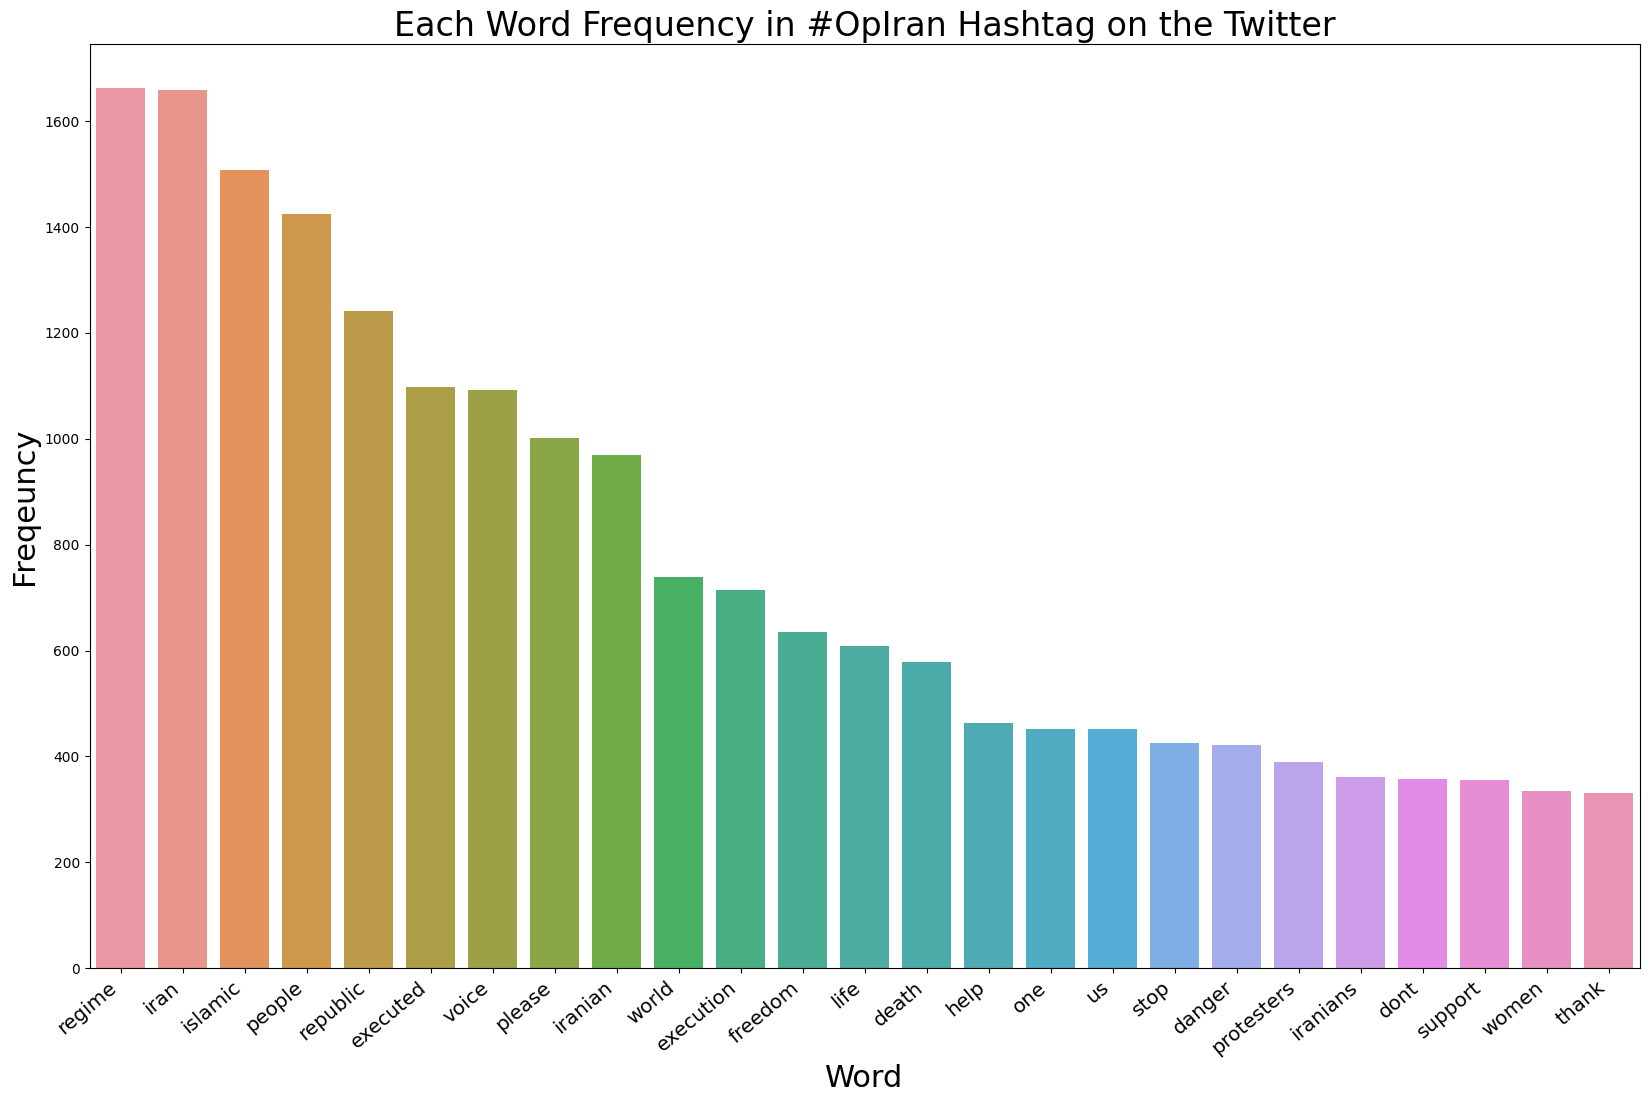

In [18]:
def plot_section(hashtag, data, x_lable):

    plt.figure(figsize=(14, 6))
    plt.xlabel(x_lable, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.title(
        f'Each {x_lable} Frequency in #{hashtag} on the Twitter', fontsize=18)
    plot = sns.barplot(x=list(data.values()), y=list(data.keys()))
    plot.set_xticklabels(plot.get_xticklabels(), fontsize='x-large')


[Text(0, 0, '#'),
 Text(1, 0, '#mahsaamini'),
 Text(2, 0, '#mohsenshekari'),
 Text(3, 0, '#iranrevolution'),
 Text(4, 0, '#iran'),
 Text(5, 0, '#iranrevoiution'),
 Text(6, 0, '#iranrevolution2022'),
 Text(7, 0, '#saytheirnames'),
 Text(8, 0, '#toomajsalehi'),
 Text(9, 0, '#womanlifefreedom'),
 Text(10, 0, '#stopexecutioniniran'),
 Text(11, 0, '#majidrezarahnavard'),
 Text(12, 0, '#iranrevoiution2022'),
 Text(13, 0, '#freeiran'),
 Text(14, 0, '#womenlifefreedom'),
 Text(15, 0, '#elnazrekabi'),
 Text(16, 0, '#alimoazzami'),
 Text(17, 0, '#iranprotests2022'),
 Text(18, 0, '#kurdistan'),
 Text(19, 0, '#iranprotests'),
 Text(20, 0, '#r2pforiran'),
 Text(21, 0, '#zahedan'),
 Text(22, 0, '#nikashakerami'),
 Text(23, 0, '#iranexecution')]

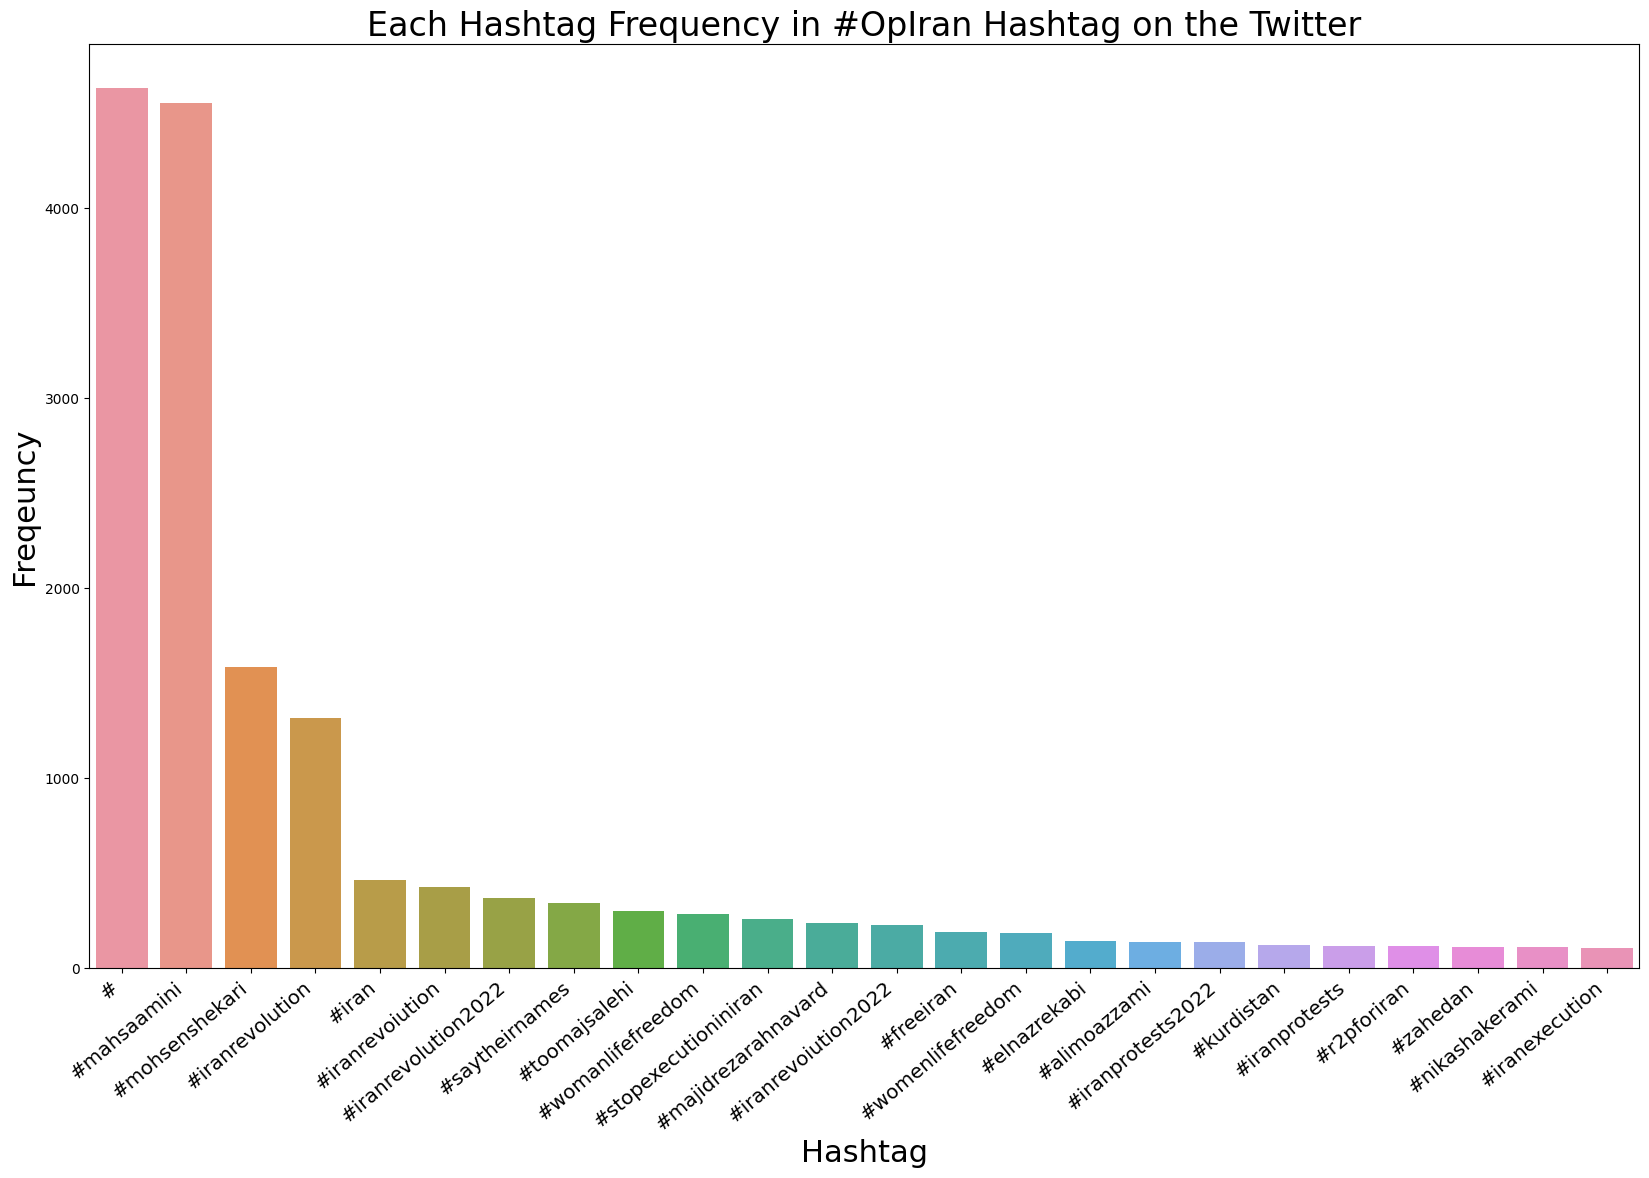

In [19]:
plt.figure(figsize= (20,12))
plt.xlabel('Hashtag', fontsize=22);
plt.ylabel('Freqeuncy', fontsize=22);
plt.title('Each Hashtag Frequency in #OpIran Hashtag on the Twitter', fontsize=24)
plot = sns.barplot(x=list(top_25_hashtag.keys()), y = list(top_25_hashtag.values()))
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right" ,fontsize='x-large')

[Text(0, 0, '@amnesty'),
 Text(1, 0, '@europarlen'),
 Text(2, 0, '@eucommission'),
 Text(3, 0, '@swedenineu'),
 Text(4, 0, '@bundestag'),
 Text(5, 0, '@germanyintheeu'),
 Text(6, 0, '@cnn'),
 Text(7, 0, '@unhumanrights'),
 Text(8, 0, '@anonymouslink'),
 Text(9, 0, '@foxnews'),
 Text(10, 0, '@youranonone'),
 Text(11, 0, '@unhrc'),
 Text(12, 0, '@flickaplattform'),
 Text(13, 0, '@guardian'),
 Text(14, 0, '@niacouncil'),
 Text(15, 0, '@reuters'),
 Text(16, 0, '@kromsec'),
 Text(17, 0, '@anonymousnn3'),
 Text(18, 0, '@dwnews'),
 Text(19, 0, '@anonymousopiran'),
 Text(20, 0, '@cnni'),
 Text(21, 0, '@dragonsecgroup'),
 Text(22, 0, '@opirangirl'),
 Text(23, 0, '@parrattarna')]

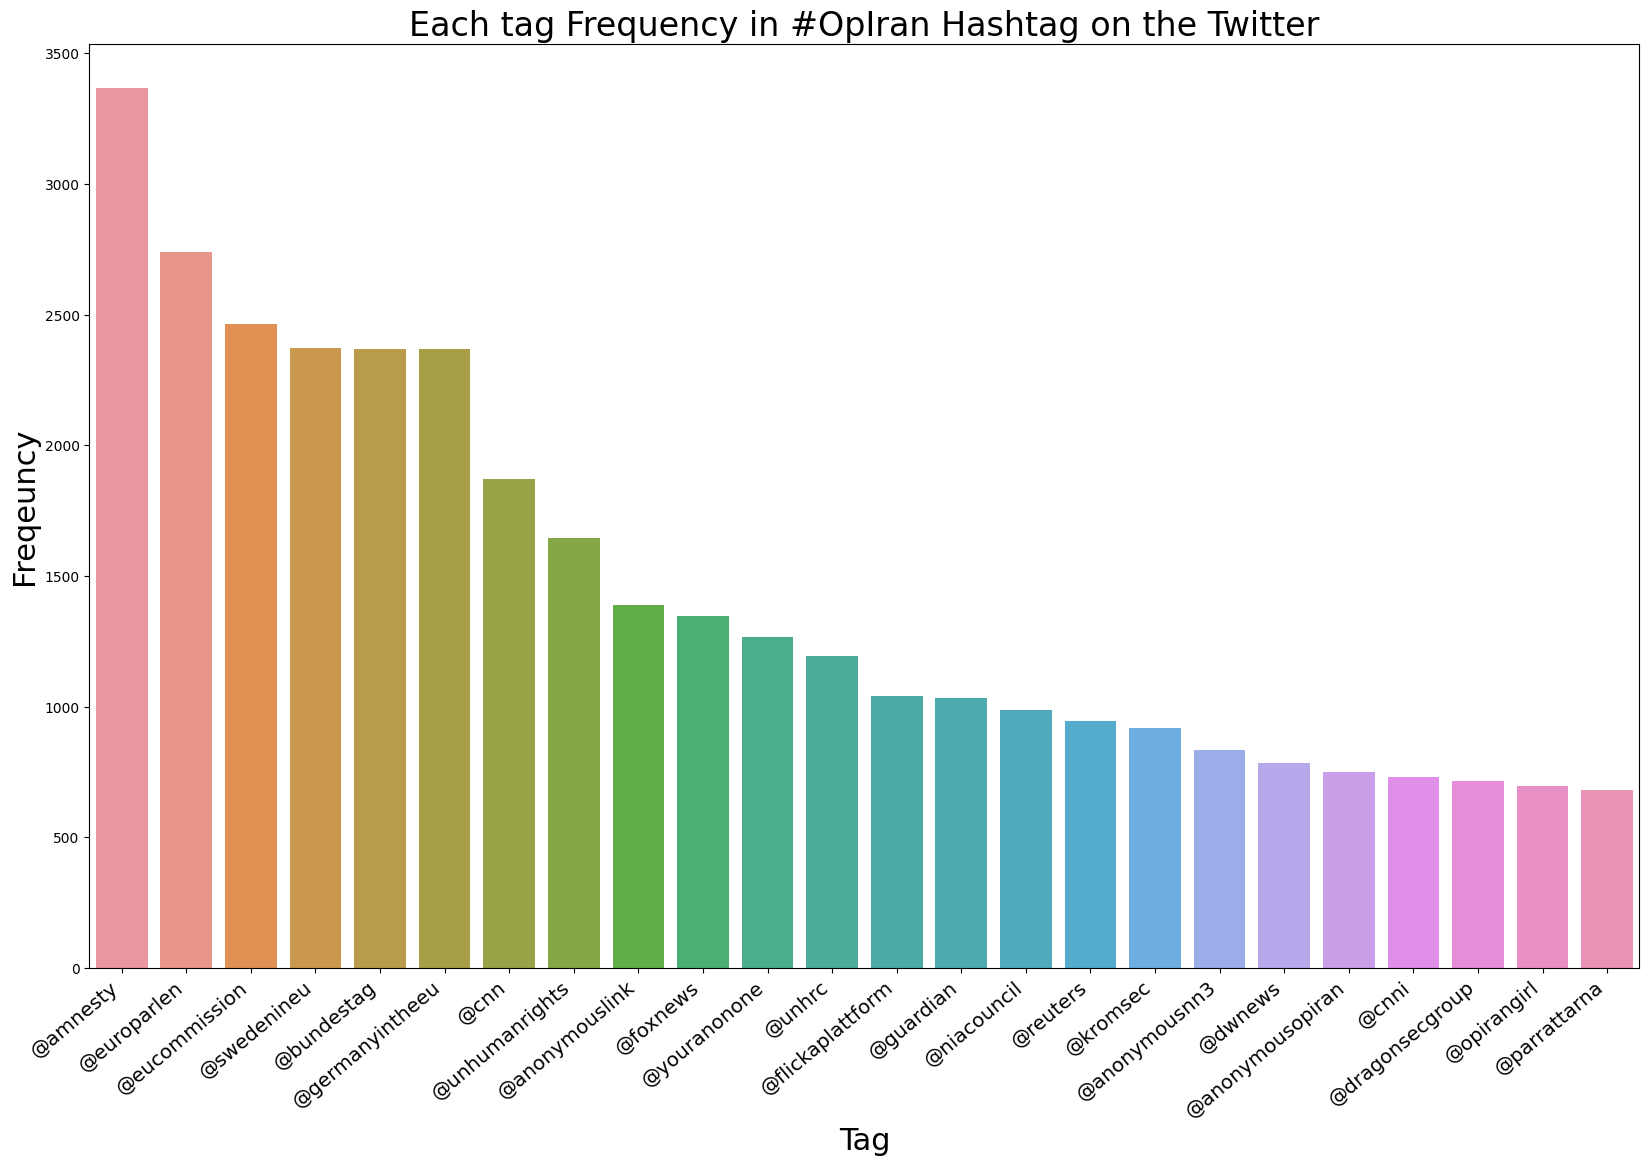

In [47]:
plt.figure(figsize= (20,12))
plt.xlabel('Tag', fontsize=22);
plt.ylabel('Freqeuncy', fontsize=22);
plt.title('Each tag Frequency in #OpIran Hashtag on the Twitter', fontsize=24)
plot = sns.barplot(x=list(top_25_tags.keys()), y = list(top_25_tags.values()))
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right" ,fontsize='x-large')